# LSTM Model 
## to Predict 
# Flu Targets, Symptoms, and Location 
## 1 Week Ahead in Berlin

In [1]:
import numpy as np

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras.callbacks import ModelCheckpoint

/net/store/scratch/odd/valid_until_31_mar_2018/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
data = np.load('flu_timeseries_train.npy')
labels = np.load('flu_timeseries_labels.npy')

# Transpose for shape of LSTM requirements
data = data.T
labels = labels.T

print(data.shape)
print(labels.shape)

(890, 42)
(890, 38)


In [28]:
# Reshape input to be [samples, time steps, features]
data = np.reshape(data, (data.shape[0], 1, data.shape[1]))

In [30]:
# Get validation and test data
train_size = int(len(data) * .70)
print("Training size:", train_size, '\n')

# Input separation
train = data[:train_size]
valid = data[train_size:]
test = valid[len(valid)//2:]
valid = valid[:len(valid)//2] # take the test data out of valid

# Label separation
train_labels = labels[:train_size]
valid_labels = labels[train_size:]
test_labels = valid_labels[len(valid_labels)//2:]
valid_labels = valid_labels[:len(valid_labels)//2] # take the test data out of valid

print("Training shape:", train.shape)
print("Validation shape:", valid.shape)
print("Test shape:", test.shape)
print('')
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", valid_labels.shape)
print("Test labels shape:", test_labels.shape)

Training size: 623 

Training shape: (623, 1, 42)
Validation shape: (133, 1, 42)
Test shape: (134, 1, 42)

Training labels shape: (623, 38)
Validation labels shape: (133, 38)
Test labels shape: (134, 38)


#### Scaling
Now we scale each feature individually into the range [0,1]

In [5]:
# HYPERPARAMETERS
DROPOUT_RATE = .5
LSTM_DROPOUT_RATE = 0

In [22]:
model = Sequential()

model.add(LSTM(256, input_shape=(1,42), activation='tanh', recurrent_activation='hard_sigmoid', 
               use_bias=True, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros', 
               dropout=LSTM_DROPOUT_RATE, recurrent_dropout=0.0, 
               stateful=False, unroll=False,
               return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, activation='tanh', recurrent_activation='hard_sigmoid', 
               use_bias=True, kernel_initializer='glorot_uniform', 
               recurrent_initializer='orthogonal', bias_initializer='zeros', 
               dropout=LSTM_DROPOUT_RATE, recurrent_dropout=0.0, 
               stateful=False, unroll=False))
model.add(Dropout(0.5))
model.add(Dense(labels.shape[1], activation='relu')) 

model.compile(loss='logcosh', optimizer='adam') # logcosh same as mse but better against outliers

In [23]:
filepath="./weights/weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [24]:
model.fit(train, train_labels, epochs=200, batch_size=128,
          callbacks=callbacks_list, verbose=2, 
          validation_data=(valid, valid_labels))

Train on 623 samples, validate on 133 samples
Epoch 1/200
Epoch 00001: loss improved from inf to 3.70749, saving model to ./weights/weights-01-3.7075.hdf5
 - 1s - loss: 3.7075 - val_loss: 9.1910
Epoch 2/200
Epoch 00002: loss improved from 3.70749 to 3.68171, saving model to ./weights/weights-02-3.6817.hdf5
 - 0s - loss: 3.6817 - val_loss: 9.1168
Epoch 3/200
Epoch 00003: loss improved from 3.68171 to 3.63784, saving model to ./weights/weights-03-3.6378.hdf5
 - 0s - loss: 3.6378 - val_loss: 9.0002
Epoch 4/200
Epoch 00004: loss improved from 3.63784 to 3.57525, saving model to ./weights/weights-04-3.5753.hdf5
 - 0s - loss: 3.5753 - val_loss: 8.8389
Epoch 5/200
Epoch 00005: loss improved from 3.57525 to 3.49777, saving model to ./weights/weights-05-3.4978.hdf5
 - 0s - loss: 3.4978 - val_loss: 8.6680
Epoch 6/200
Epoch 00006: loss improved from 3.49777 to 3.43374, saving model to ./weights/weights-06-3.4337.hdf5
 - 0s - loss: 3.4337 - val_loss: 8.5443
Epoch 7/200
Epoch 00007: loss improved f

 - 0s - loss: 2.5949 - val_loss: 6.8410
Epoch 60/200
Epoch 00060: loss improved from 2.59488 to 2.58624, saving model to ./weights/weights-60-2.5862.hdf5
 - 0s - loss: 2.5862 - val_loss: 6.8102
Epoch 61/200
Epoch 00061: loss improved from 2.58624 to 2.57265, saving model to ./weights/weights-61-2.5727.hdf5
 - 0s - loss: 2.5727 - val_loss: 6.8123
Epoch 62/200
Epoch 00062: loss improved from 2.57265 to 2.55033, saving model to ./weights/weights-62-2.5503.hdf5
 - 0s - loss: 2.5503 - val_loss: 6.7799
Epoch 63/200
Epoch 00063: loss did not improve
 - 0s - loss: 2.5620 - val_loss: 6.8224
Epoch 64/200
Epoch 00064: loss did not improve
 - 0s - loss: 2.5582 - val_loss: 6.7438
Epoch 65/200
Epoch 00065: loss improved from 2.55033 to 2.54180, saving model to ./weights/weights-65-2.5418.hdf5
 - 0s - loss: 2.5418 - val_loss: 6.7257
Epoch 66/200
Epoch 00066: loss did not improve
 - 0s - loss: 2.5579 - val_loss: 6.7780
Epoch 67/200
Epoch 00067: loss improved from 2.54180 to 2.53558, saving model to ./

Epoch 134/200
Epoch 00134: loss did not improve
 - 0s - loss: 2.2037 - val_loss: 5.9078
Epoch 135/200
Epoch 00135: loss improved from 2.19884 to 2.17385, saving model to ./weights/weights-135-2.1739.hdf5
 - 0s - loss: 2.1739 - val_loss: 5.9236
Epoch 136/200
Epoch 00136: loss did not improve
 - 0s - loss: 2.1951 - val_loss: 5.8441
Epoch 137/200
Epoch 00137: loss did not improve
 - 0s - loss: 2.2207 - val_loss: 5.8132
Epoch 138/200
Epoch 00138: loss did not improve
 - 0s - loss: 2.2194 - val_loss: 5.8605
Epoch 139/200
Epoch 00139: loss did not improve
 - 0s - loss: 2.2310 - val_loss: 5.8867
Epoch 140/200
Epoch 00140: loss did not improve
 - 0s - loss: 2.2070 - val_loss: 5.8320
Epoch 141/200
Epoch 00141: loss did not improve
 - 0s - loss: 2.1932 - val_loss: 5.9396
Epoch 142/200
Epoch 00142: loss did not improve
 - 0s - loss: 2.1917 - val_loss: 5.8206
Epoch 143/200
Epoch 00143: loss improved from 2.17385 to 2.15571, saving model to ./weights/weights-143-2.1557.hdf5
 - 0s - loss: 2.1557 - v

In [39]:
#TESTETASL:
print(len(test))
print(test[0])
print(test[0].shape)
print(np.expand_dims(test[0], axis=1).shape)

134
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         23.84        7.51        0.47       -0.74327877]]
(1, 42)
(1, 1, 42)


In [44]:
predictions = []
for i in range(len(test)):
    predictions.append(model.predict(np.expand_dims(test[i], axis=1)))
predictions = np.asarray(predictions)
print(predictions.shape)

(134, 1, 38)


In [56]:
print(test_labels[5:10])
print(test_labels[:,0])
print(test_labels.shape)
predictions = np.reshape(predictions, test_labels.shape)
print(predictions.shape)

[[1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[  0.   1.   0.   0.   0.   1.   0.   0.   1.   1.   0.   1.   0.   2.
   2.   2.   1.   3.   0.   2.   5.   6.   7.  11.  44.  63. 121. 152.
 156. 163. 206. 210. 243. 232. 165. 125.  99.  67.  31.  21.  10.   9.
   1.   0.   2.   0.   0.   0.   0.   1.   1.   0.   4.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   2.   1.   5.   8.
   9.  16.  34.  47.  58.  97. 141. 177. 251. 266

In [48]:
print(len(test_labels[:,0]))
print(len(predictions[:,0]))

134
134


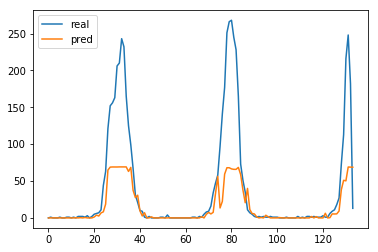

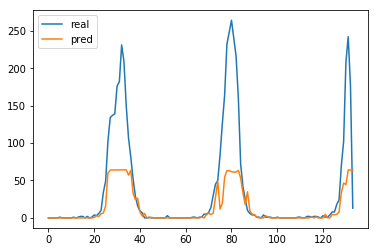

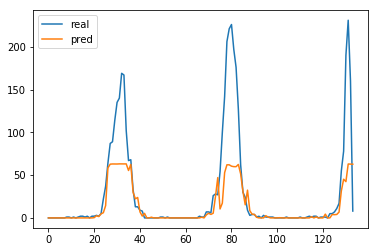

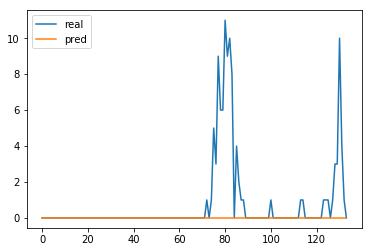

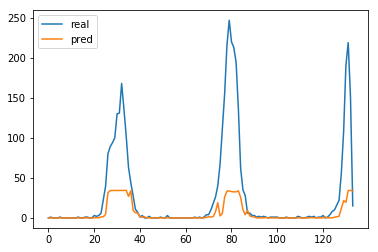

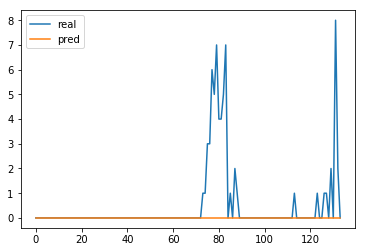

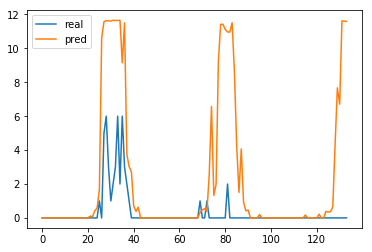

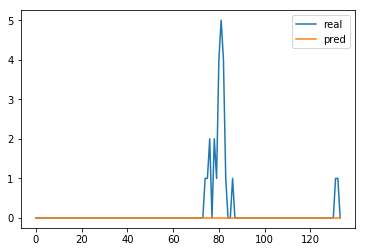

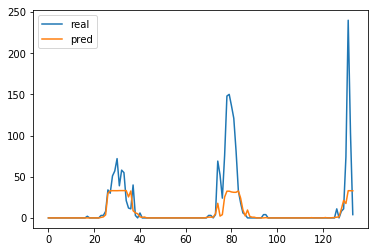

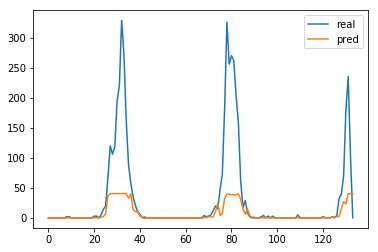

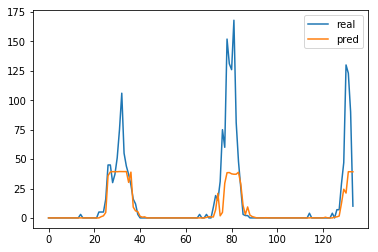

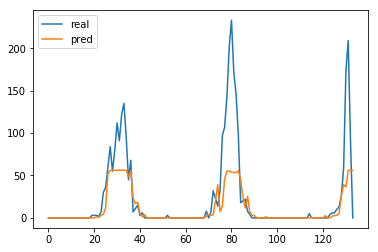

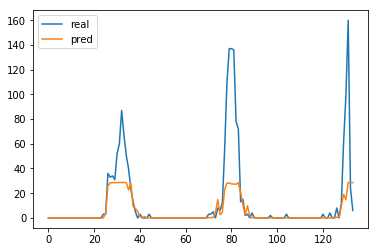

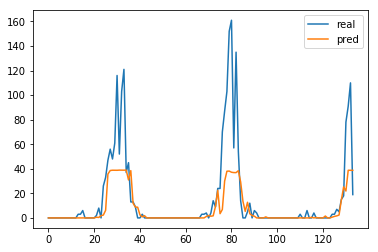

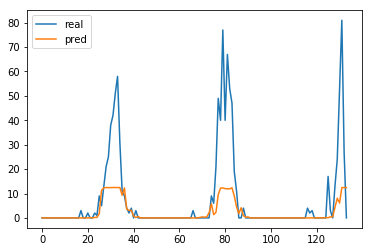

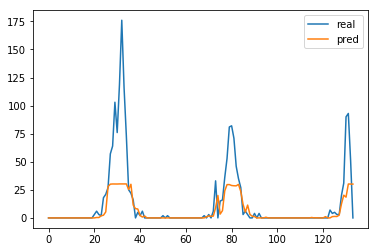

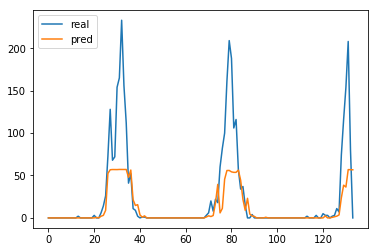

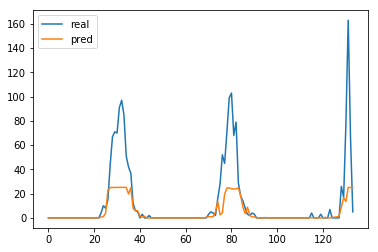

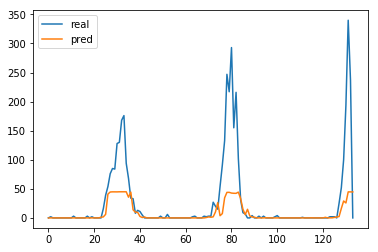

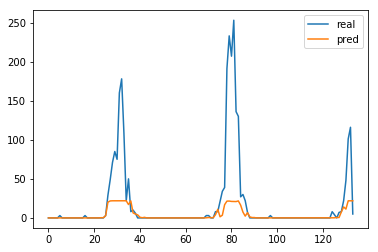

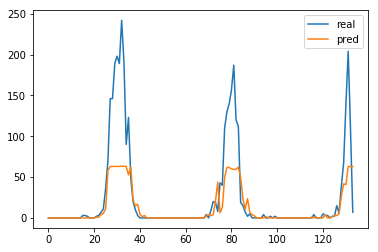

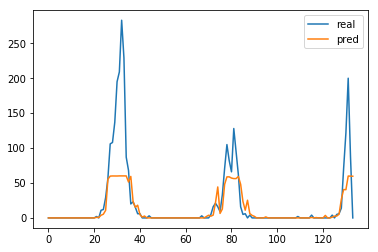

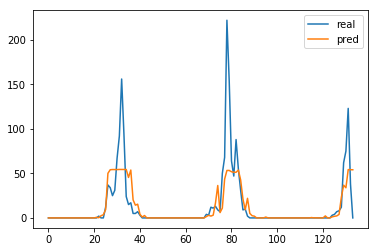

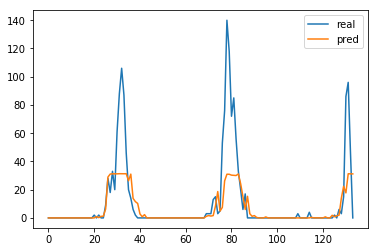

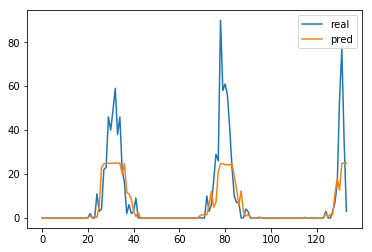

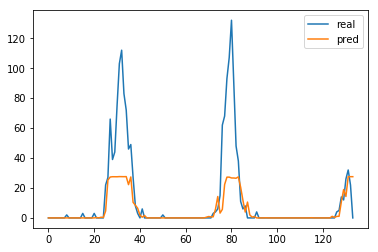

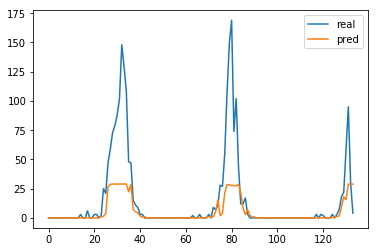

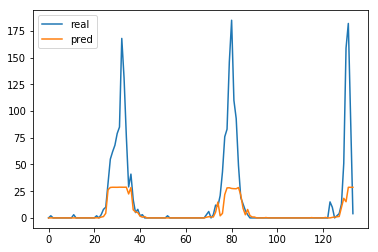

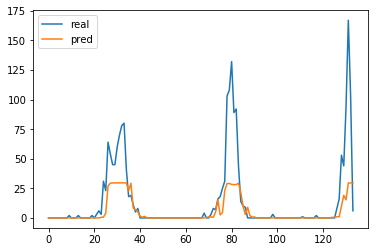

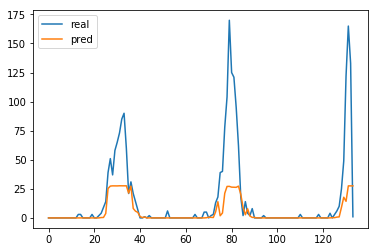

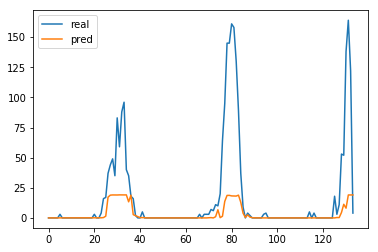

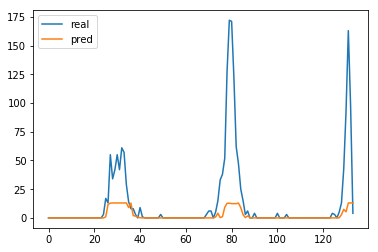

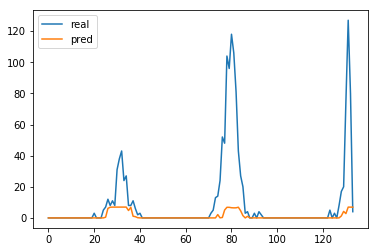

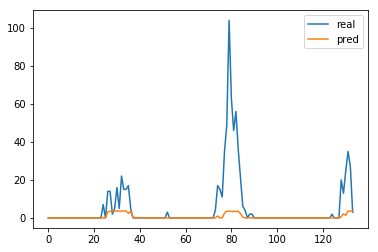

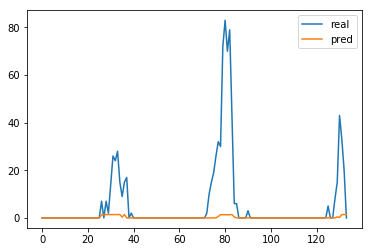

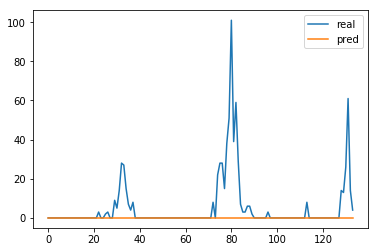

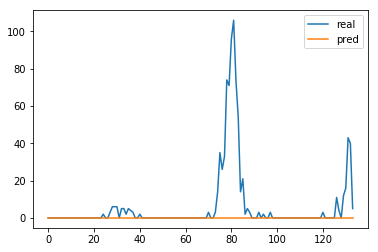

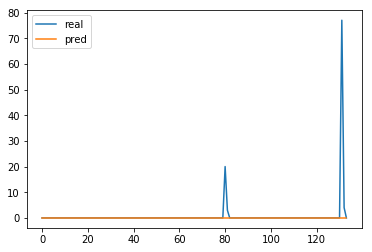

In [59]:
import matplotlib.pyplot as plt


for i in range(38):
    real = test_labels[:,i]
    pred = predictions[:,i]
    
    plt.plot(real, label='real')
    plt.plot(pred, label='pred')
    
    plt.legend()
    plt.show()